<a href="https://colab.research.google.com/github/IgorEisenlohr/MVP-sprint-2/blob/main/MVP_sprint_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/IgorEisenlohr/MVP-sprint-2/main/usa_real_state/realtor-data.csv'
df = pd.read_csv(url, parse_dates=['sold_date'])
df.head()

,status,price,bed,bath,acre_lot,full_address,street,city,state,zip_code,house_size,sold_date
0,for_sale,105000.0,3.0,2.0,0.12,"Sector Yahuecas Titulo # V84, Adjuntas, PR, 00601",Sector Yahuecas Titulo # V84,Adjuntas,Puerto Rico,601.0,920.0,NaT
1,for_sale,80000.0,4.0,2.0,0.08,"Km 78 9 Carr # 135, Adjuntas, PR, 00601",Km 78 9 Carr # 135,Adjuntas,Puerto Rico,601.0,1527.0,NaT
2,for_sale,67000.0,2.0,1.0,0.15,"556G 556-G 16 St, Juana Diaz, PR, 00795",556G 556-G 16 St,Juana Diaz,Puerto Rico,795.0,748.0,NaT
3,for_sale,145000.0,4.0,2.0,0.10,"R5 Comunidad El Paraso Calle De Oro R-5 Ponce,...",R5 Comunidad El Paraso Calle De Oro R-5 Ponce,Ponce,Puerto Rico,731.0,1800.0,NaT
4,for_sale,65000.0,6.0,2.0,0.05,"14 Navarro, Mayaguez, PR, 00680",14 Navarro,Mayaguez,Puerto Rico,680.0,NaN,NaT


In [ ]:
df.shape

(512159, 12)

In [ ]:
df.isnull().sum()

status               0
price                0
bed              98937
bath             95218
acre_lot        104979
full_address         0
street             616
city                59
state                0
zip_code           197
house_size      116466
sold_date       309652
dtype: int64

# Deep Learning

In [1]:
!git clone https://github.com/IgorEisenlohr/MVP-sprint-2.git

Cloning into 'MVP-sprint-2'...
remote: Enumerating objects: 5853, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 5853 (delta 0), reused 0 (delta 0), pack-reused 5843
Receiving objects: 100% (5853/5853), 1.14 GiB | 17.89 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Updating files: 100% (5858/5858), done.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [4]:
# main
main_dir = '/content/MVP-sprint-2/chest_xray'

# train
train_dir = os.path.join(main_dir, 'train')
train_pneumonia = os.path.join(train_dir, 'PNEUMONIA')
train_normal = os.path.join(train_dir, 'NORMAL')

# val
val_dir = os.path.join(main_dir, 'val')
val_pneumonia = os.path.join(val_dir, 'PNEUMONIA')
val_normal = os.path.join(val_dir, 'NORMAL')

# test
test_dir = os.path.join(main_dir, 'test')
test_pneumonia = os.path.join(test_dir, 'PNEUMONIA')
test_normal = os.path.join(test_dir, 'NORMAL')

In [64]:
train_pneumonia_files = os.listdir(train_pneumonia)
print(f'Número de imagens de treino para pneumonia: {len(train_pneumonia_files)}')
train_normal_files = os.listdir(train_normal)
print(f'Número de imagens de treino para casos normais: {len(train_normal_files)}')

train_normal_df = pd.DataFrame({'dir':train_normal, 'file': train_normal_files, 'class':'NORMAL'})
train_pneumonia_df = pd.DataFrame({'dir':train_pneumonia, 'file': train_pneumonia_files, 'class':'PNEUMONIA'})
train_df = pd.concat([train_normal_df, train_pneumonia_df], axis=0)
train_df.head()

Número de imagens de treino para pneumonia: 3875
Número de imagens de treino para casos normais: 1341


,dir,file,class
0,/content/MVP-sprint-2/chest_xray/train/NORMAL,NORMAL2-IM-1242-0001.jpeg,NORMAL
1,/content/MVP-sprint-2/chest_xray/train/NORMAL,IM-0497-0001-0001.jpeg,NORMAL
2,/content/MVP-sprint-2/chest_xray/train/NORMAL,IM-0508-0001.jpeg,NORMAL
3,/content/MVP-sprint-2/chest_xray/train/NORMAL,IM-0641-0001.jpeg,NORMAL
4,/content/MVP-sprint-2/chest_xray/train/NORMAL,NORMAL2-IM-0661-0001.jpeg,NORMAL


In [57]:
val_pneumonia_files = os.listdir(val_pneumonia)
print(f'Número de imagens de validação para pneumonia: {len(val_pneumonia_files)}')
val_normal_files = os.listdir(val_normal)
print(f'Número de imagens de validação para casos normais: {len(val_normal_files)}')

Número de imagens de validação para pneumonia: 8
Número de imagens de validação para casos normais: 8


In [58]:
test_pneumonia_files = os.listdir(test_pneumonia)
print(f'Número de imagens de teste para pneumonia: {len(test_pneumonia_files)}')
test_normal_files = os.listdir(test_normal)
print(f'Número de imagens de teste para casos normais: {len(test_normal_files)}')

Número de imagens de teste para pneumonia: 390
Número de imagens de teste para casos normais: 234


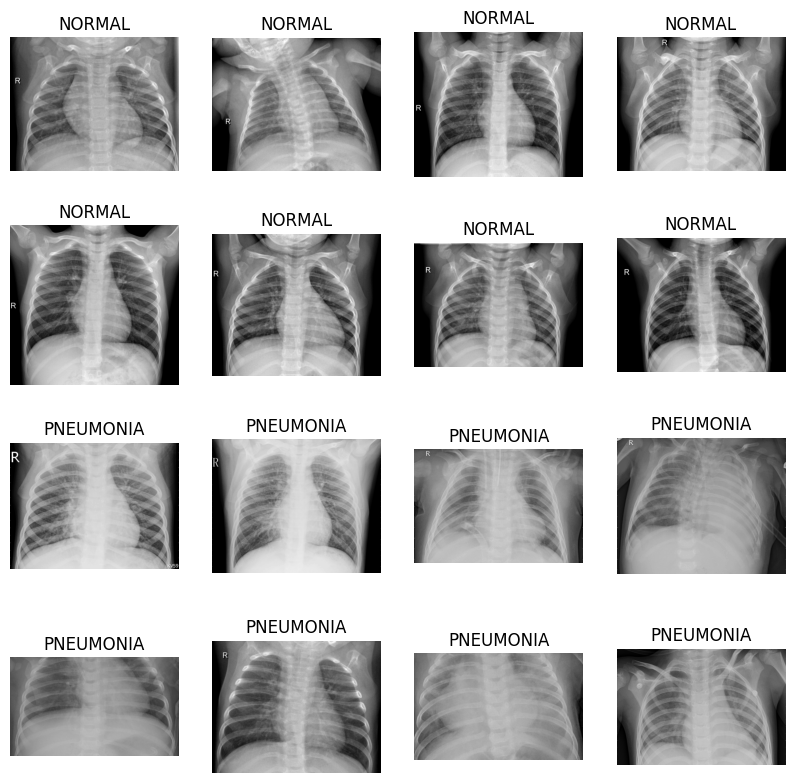

In [8]:
normal_images = [os.path.join(train_normal, filename) for filename in train_normal_files[0:8]]
pneumonia_images = [os.path.join(train_pneumonia, filename) for filename in train_pneumonia_files[0:8]]
images = normal_images+pneumonia_images

plt.figure(figsize=(10,10))
for i, image in enumerate(images, start=1):
  plt.subplot(4,4,i)
  img = Image.open(image)
  plt.imshow(img, cmap='gray')
  plt.axis('off')
  plt.title(image.split('/')[-2])

In [11]:
generator_train = ImageDataGenerator(rescale=1./255,
                                     validation_split=0.2,
                                     zoom_range=0.3,
                                     rotation_range=20,
                                     horizontal_flip=True,
                                     brightness_range=(1, 1.5),
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     shear_range=0.2)

generator_val  = ImageDataGenerator(rescale= 1./255)

train = generator_train.flow_from_directory(train_dir,
                                            target_size=(150,150),
                                            batch_size=25,
                                            class_mode='binary',
                                            color_mode='grayscale')

val = generator_val.flow_from_directory(val_dir,
                                          target_size=(150,150),
                                          batch_size=25,
                                          class_mode='binary',
                                            color_mode='grayscale')

test = generator_val.flow_from_directory(test_dir,
                                            target_size=(150,150),
                                            batch_size=25,
                                            class_mode='binary',
                                            color_mode='grayscale')


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [12]:
train.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding="SAME", activation='relu', input_shape=(150,150,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, (3,3), padding="SAME", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3,3), padding="SAME", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3,3), padding="SAME", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      320       
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 75, 75, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 75, 75, 64)      

In [20]:
from keras import metrics
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy', metrics.Precision(), metrics.Recall()])

In [21]:
from sklearn.utils import class_weight

train_labels = train.classes
class_counts = np.bincount(train_labels)
total_samples = len(train_labels)
class_weights = total_samples / (len(class_counts) * class_counts)
class_weights = {0:class_weights[0], 1:class_weights[1]}
class_weights

{0: 1.9448173005219984, 1: 0.6730322580645162}

In [24]:
history = model.fit(train, validation_data=val, epochs = 15, class_weight=class_weights)

Epoch 1/15
209/209 [==============================] - 70s 333ms/step - loss: 0.1486 - accuracy: 0.9436 - precision_1: 0.9854 - recall_1: 0.9381 - val_loss: 7.3643 - val_accuracy: 0.5000 - val_precision_1: 0.5000 - val_recall_1: 1.0000
Epoch 2/15
209/209 [==============================] - 68s 327ms/step - loss: 0.1541 - accuracy: 0.9360 - precision_1: 0.9818 - recall_1: 0.9311 - val_loss: 1.3036 - val_accuracy: 0.5625 - val_precision_1: 1.0000 - val_recall_1: 0.1250
Epoch 3/15
209/209 [==============================] - 69s 328ms/step - loss: 0.1646 - accuracy: 0.9360 - precision_1: 0.9802 - recall_1: 0.9326 - val_loss: 1.3612 - val_accuracy: 0.5625 - val_precision_1: 0.5333 - val_recall_1: 1.0000
Epoch 4/15
209/209 [==============================] - 69s 330ms/step - loss: 0.1527 - accuracy: 0.9417 - precision_1: 0.9824 - recall_1: 0.9383 - val_loss: 1.9219 - val_accuracy: 0.6250 - val_precision_1: 1.0000 - val_recall_1: 0.2500
Epoch 5/15
209/209 [==============================] - 69s 33

In [25]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1'])

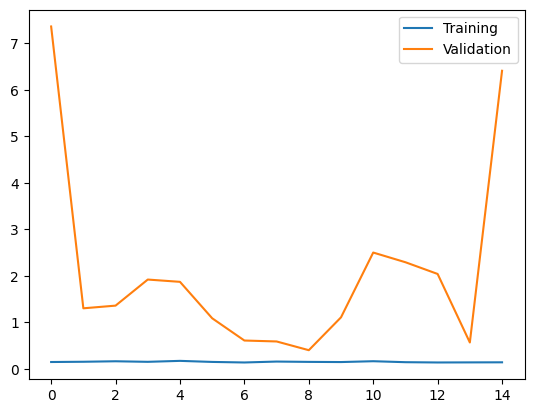

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])

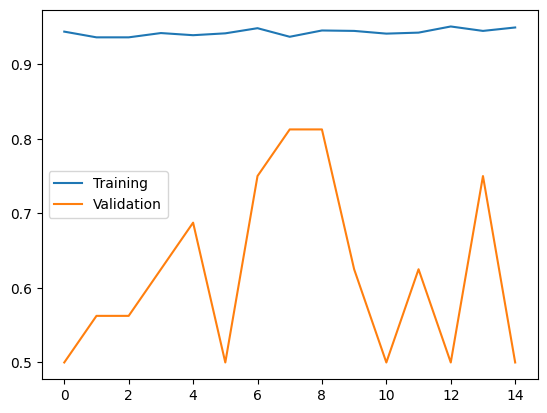

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training','Validation'])

In [28]:
predictions = model.predict(test, steps=len(test))
predicted_labels = np.round(predictions).flatten()
true_labels = test.classes
correct_predictions = np.sum(predicted_labels == true_labels)
total_predictions = len(test.filenames)
accuracy = correct_predictions / total_predictions

print("Total de predições corretas:", correct_predictions)
print("Total de predições:", total_predictions)
print("Acurácia do modelo:", accuracy)


25/25 [==============================] - 5s 210ms/step
Total de predições corretas: 390
Total de predições: 624
Acurácia do modelo: 0.625


In [29]:
y_test = val.classes
y_pred = model.predict(val)
y_pred_probs = y_pred.copy()
y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

1/1 [==============================] - 0s 170ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

      Normal       0.00      0.00      0.00         8
   Pnuemonia       0.50      1.00      0.67         8

    accuracy                           0.50        16
   macro avg       0.25      0.50      0.33        16
weighted avg       0.25      0.50      0.33        16



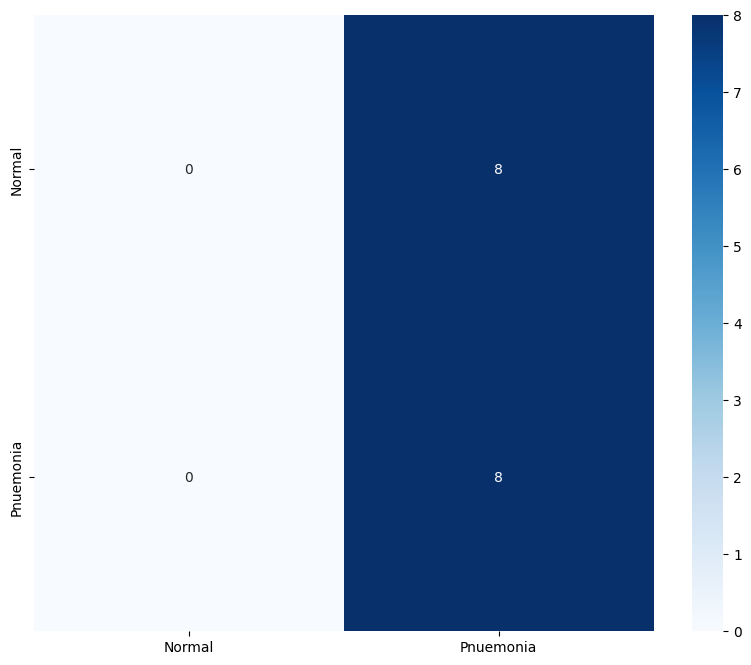

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print(classification_report(y_test,y_pred,target_names = ['Normal','Pnuemonia']))
plt.figure(figsize=(10,8))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.3g',xticklabels=['Normal','Pnuemonia'],
            yticklabels=['Normal','Pnuemonia'],cmap='Blues')
plt.show()

In [ ]:
y_test = test.classes
y_pred = model.predict(test)
y_pred_probs = y_pred.copy()

y_pred[y_pred>0.5] = 1
y_pred[y_pred<0.5] = 0

20/20 [==============================] - 6s 296ms/step


In [31]:
import pandas as pd
filenames = test.filenames
data = pd.DataFrame()
data['filename'] = filenames
data['actual_class'] = y_test
data['predicted_class'] = y_pred
data['predicted_prob'] = y_pred_probs
data.head(20)

ValueError: ignored